# Metro Interstate Traffic Volume Data Set


_Use this notebook to practice your exploratory data analysis and visualization skills._

<div class="alert alert-block alert-success"  style="display:inline-block;" markdown="1">

**EXPLORE:** Click on the <kbd> Edit App </kbd> button in the top right corner of this page, to interact with this Jupyter notebook
<br><br>
To navigate through **this notebook** simply press the <kbd>shift</kbd> + <kbd>Enter</kbd> keys to run each **block of code**. 

You can include new blocks of code or text throughout the notebook to continue exploring and programming with R. 
</div>

(New to Jupyter notebooks? See the [help page](https://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Notebook/Index.ipynb) for more on working with Jupyter notebooks)

<div class="alert alert-block alert-warning" style="display:inline-block;" markdown="1">

**Original dataset** can be found at: https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

Version of the data used in this notebook is also available in [this repo](https://github.com/reisanar/datasets/blob/master/trafficMN.csv).
</div>

## Load packages

In [2]:
# use data science tools from the tidyverse
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Read the data

This datasets contains hourly Interstate 94 Westbound traffic volume for [Minnesota (MN) Department of Transportation (DoT)](https://www.dot.state.mn.us/traffic/data/coll-methods.html) Automatic Traffic Recorder (ATR) station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays are also included for impacts on traffic volume.


The dataset used in this notebook is from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php), and it contains 48204 observations with 9 different attributes 9. A data dictionary is included below: 


Variable Name           | Type       | Description
------------------------|------------|--------------------------------------------------------
`holiday`   | Categorical     | US National holidays plus regional holiday, Minnesota State Fair
`temp`      | Numeric  | Average temperature in Kelvin
`rain_1h`   | Numeric         | Amount in mm of rain that occurred in the hour
`snow_1h`   | Numeric         | Amount in mm of snow that occurred in the hour
`clouds_all`| Numeric         | Percentage of cloud cover
`weather_main` |  Categorical | Short textual description of the current weather
`weather_description` | Categorical | Longer textual description of the current weather
`date_time`  | DateTime   | Hour of the data collected in local CST time
`traffic_volume`  | Numeric  | Hourly I-94 ATR 301 reported westbound traffic volume

_Central Standard Time (CST) is 6 hours behind Coordinated Universal Time (UTC)._ 


Below we read the `.csv` file using `readr::read_csv()` (the `readr` package is part of the `tidyverse`)

In [3]:
traffic <- read_csv("../data/trafficMN.csv", col_types = cols())

We can use the `summary()` function to get basic summary statistics on the different attributes of this dataset.

In [4]:
summary(traffic)

   holiday               temp          rain_1h            snow_1h         
 Length:48204       Min.   :  0.0   Min.   :   0.000   Min.   :0.0000000  
 Class :character   1st Qu.:272.2   1st Qu.:   0.000   1st Qu.:0.0000000  
 Mode  :character   Median :282.4   Median :   0.000   Median :0.0000000  
                    Mean   :281.2   Mean   :   0.334   Mean   :0.0002224  
                    3rd Qu.:291.8   3rd Qu.:   0.000   3rd Qu.:0.0000000  
                    Max.   :310.1   Max.   :9831.300   Max.   :0.5100000  
   clouds_all     weather_main       weather_description
 Min.   :  0.00   Length:48204       Length:48204       
 1st Qu.:  1.00   Class :character   Class :character   
 Median : 64.00   Mode  :character   Mode  :character   
 Mean   : 49.36                                         
 3rd Qu.: 90.00                                         
 Max.   :100.00                                         
   date_time                   traffic_volume
 Min.   :2012-10-02 09:00:00  

In [5]:
# find dimensions of the dataset
dim(traffic)

[1] 48204     9

In [6]:
# use the function glimpse() to see a different type of summary
glimpse(traffic)

Rows: 48,204
Columns: 9
$ holiday             <chr> "None", "None", "None", "None", "None", "None", "N…
$ temp                <dbl> 288.28, 289.36, 289.58, 290.13, 291.14, 291.72, 29…
$ rain_1h             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ snow_1h             <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ clouds_all          <dbl> 40, 75, 90, 90, 75, 1, 1, 1, 20, 20, 20, 1, 1, 1, …
$ weather_main        <chr> "Clouds", "Clouds", "Clouds", "Clouds", "Clouds", …
$ weather_description <chr> "scattered clouds", "broken clouds", "overcast clo…
$ date_time           <dttm> 2012-10-02 09:00:00, 2012-10-02 10:00:00, 2012-10…
$ traffic_volume      <dbl> 5545, 4516, 4767, 5026, 4918, 5181, 5584, 6015, 57…


Notice that the summary returned by using the `glimpse()` function, also includes the total number of observations (rows), total number of variables/attributes (columns), and the _type_ of each column (as it was interpreted by the `readr::read_csv()` function.

It is also important to point out that the variable `date_time` is of type `ddtm`, and R provides a great set of tools to [deal with date-time information](https://r4ds.had.co.nz/dates-and-times.html) thorugh the use of the `lubridate` package (part of the `tidyverse`!).

<img src="../figs/ATR-station-MN.png" alt="MN ATR 301 station" width="80%"/>

In [7]:
# load the lubridate package as well - not a core package, so it needs to be loaded
suppressMessages(library(lubridate))

## Working with dates and times

The `lubridate` package allows us to esily handle date and time data, including extracting relevant information from a date-time variable (e.g., day of the week, month, hour, etc.) and even performing arithmetic operations that take into account time zones, daylight savings, and more (e.g., answering _how many days have passes since X date?_)

Let us explore some of this functionality by extracting the month, day, year, hour, and minute, from the column `date_time`. Additionally, we will transform the temperature values from Kelvin to Fahrenheit (using the relation F = (0K − 273.15) × 9/5 + 32)

In [8]:
traffic_MN<- traffic %>% 
              mutate(month = month(date_time, label = T), 
                     day   = day(date_time), 
                     year  = year(date_time),
                     hour  = hour(date_time), 
                     minute = minute(date_time), 
                     day_of_week = wday(date_time, label = TRUE), 
                     temp_Fah = (temp - 273.15)*9/5 + 32
                     )
# check data 
traffic_MN

holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,day,year,hour,minute,day_of_week,temp_Fah
None,288.28,0,0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,Oct,2,2012,9,0,Tue,59.234
None,289.36,0,0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,Oct,2,2012,10,0,Tue,61.178
None,289.58,0,0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,Oct,2,2012,11,0,Tue,61.574
None,290.13,0,0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,Oct,2,2012,12,0,Tue,62.564
None,291.14,0,0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,Oct,2,2012,13,0,Tue,64.382
None,291.72,0,0,1,Clear,sky is clear,2012-10-02 14:00:00,5181,Oct,2,2012,14,0,Tue,65.426
None,293.17,0,0,1,Clear,sky is clear,2012-10-02 15:00:00,5584,Oct,2,2012,15,0,Tue,68.036
None,293.86,0,0,1,Clear,sky is clear,2012-10-02 16:00:00,6015,Oct,2,2012,16,0,Tue,69.278
None,294.14,0,0,20,Clouds,few clouds,2012-10-02 17:00:00,5791,Oct,2,2012,17,0,Tue,69.782
None,293.10,0,0,20,Clouds,few clouds,2012-10-02 18:00:00,4770,Oct,2,2012,18,0,Tue,67.910


Just with the new columns above, we could do an analysis of traffic volume by day of the week, month, hour, and more. 

## Aggregating data

Let us try to create a summary that tell us about the total traffic volume for each week of the different years for which we have data. A useful function for this is the [`lubridate::week()` function](https://lubridate.tidyverse.org/reference/week.html) that returns the number of complete seven day periods that have occurred between the date and January 1st, plus one.

In [9]:
traffic_week <- traffic_MN %>%
  mutate(week_of_year = week(date_time)) %>%
  group_by(week_of_year, year) %>%
  summarize(total_ATR = sum(traffic_volume, na.rm = T), .groups = "drop")

We now use the weekly traffic data to create a trend line for the years 2013 to 2018 (i.e., ignore data from 2012 for this visualization)

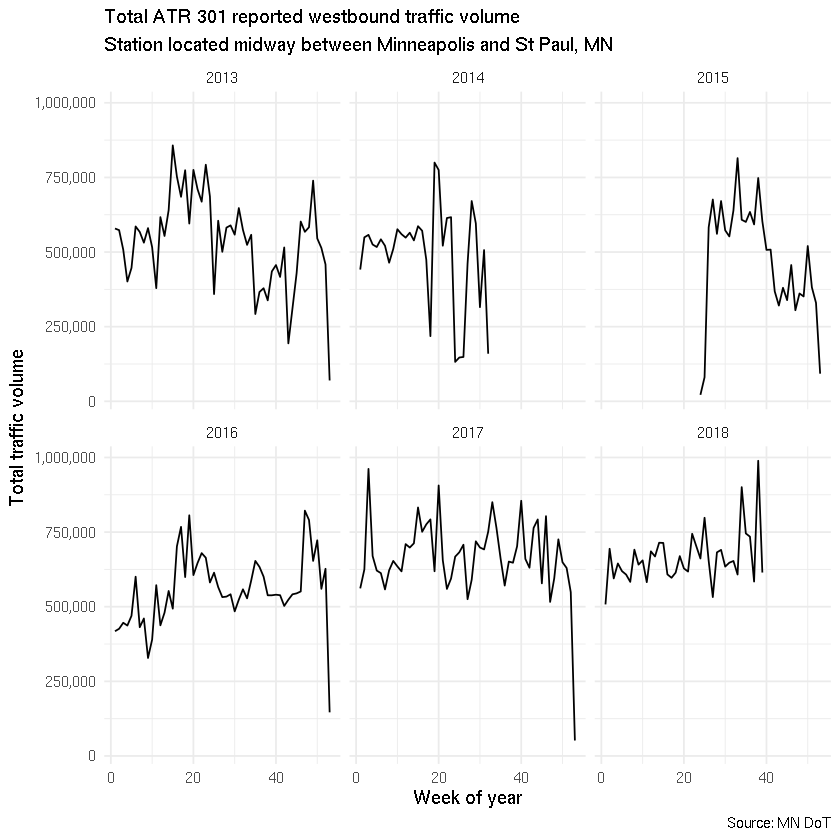

In [10]:
traffic_week %>%
  filter(year != 2012) %>%
  ggplot() + 
  geom_line(aes(x = week_of_year, y = total_ATR)) + 
  facet_wrap(vars(year)) + 
  labs(x = "Week of year", y = "Total traffic volume", 
       title = "Total ATR 301 reported westbound traffic volume", 
       subtitle = "Station located midway between Minneapolis and St Paul, MN", 
       caption = 'Source: MN DoT') + 
  scale_y_continuous(labels = scales::comma) + 
  theme_minimal()

In the creation of the above plot we utilized the _faceting_ (subplots) technique (using `facet_wrap()`) to compare different years (this is also sometimes called _"small multiples"_). Notice also the use of the `scales::comma` function to improve the readability of the charts. Notice also the custom labels for the both axes, title, subtitle, and caption.

<div class="alert alert-block alert-warning" style="display:inline-block;" markdown="1">

**Practice**: what other type of comparison can you create? For example, if we focus on a particular year, could you analyze what occurs in the different months of the year in terms of the total traffic volume?

</div>

You could compare the traffic during different months of a given year using the code below:

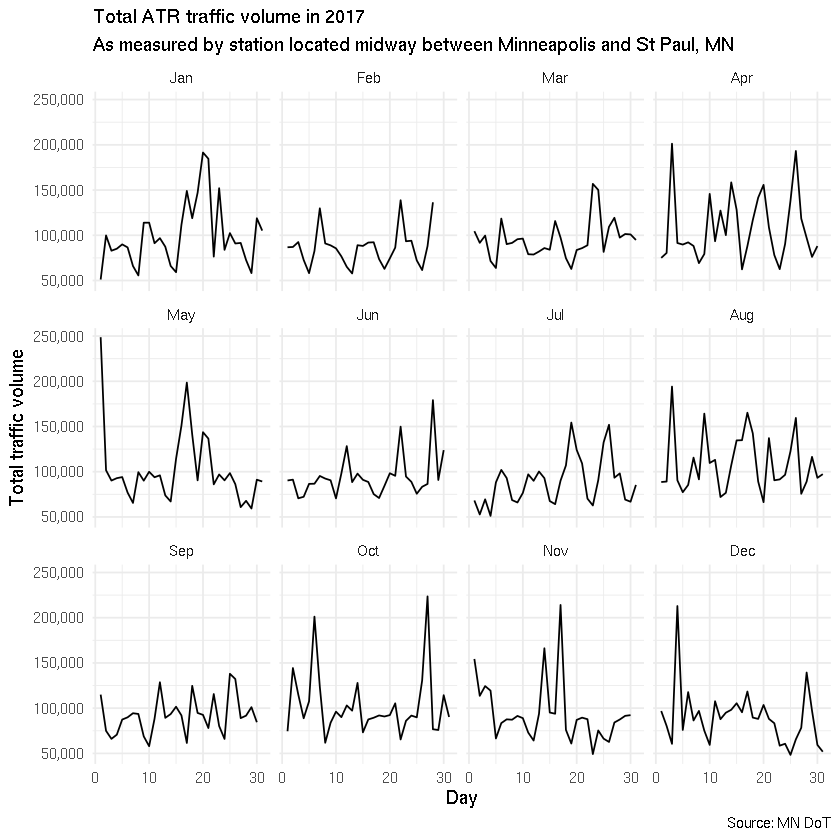

In [11]:
traffic_MN %>%
  group_by(day, month, year) %>%
  summarize(total_ATR = sum(traffic_volume, na.rm = T), .groups = "drop") %>%
  filter(year == 2017) %>%
  ggplot() + 
  geom_line(aes(x = day, y = total_ATR)) + 
  facet_wrap(vars(month)) + 
  labs(x = "Day", y = "Total traffic volume", 
       title = "Total ATR traffic volume in 2017", 
       subtitle = "As measured by station located midway between Minneapolis and St Paul, MN", 
       caption = 'Source: MN DoT') + 
  scale_y_continuous(labels = scales::comma) + 
  theme_minimal()

<div class="alert alert-block alert-warning" style="display:inline-block;" markdown="1">

**Practice**: how would you incorporate weather information in this type of analysis?

</div>

Some other things that one could consider when analyzing this type of data include:

- Seasonality (Yearly, Weekly, Daily, Holiday Related, Moving Holidays!)
- Change in behavior
- Change in population
- Construction seasons and improvements to roads
- Financial markets trends
- Big events (e.g., the Super Bowl - 2018/02/04 @ the U.S. Bank Stadium, Minneapolis)

## Holidays

Analyze the traffic during holidays in multiple years.

In [12]:
traffic_MN %>%
  group_by(holiday, year) %>%
  summarize(total_ATR = sum(traffic_volume, na.rm = T), .groups = "drop")

holiday,year,total_ATR
Christmas Day,2012,803
Christmas Day,2013,712
Christmas Day,2015,894
Christmas Day,2016,1464
Christmas Day,2017,1092
Columbus Day,2012,455
Columbus Day,2013,615
Columbus Day,2015,494
Columbus Day,2016,484
Columbus Day,2017,549


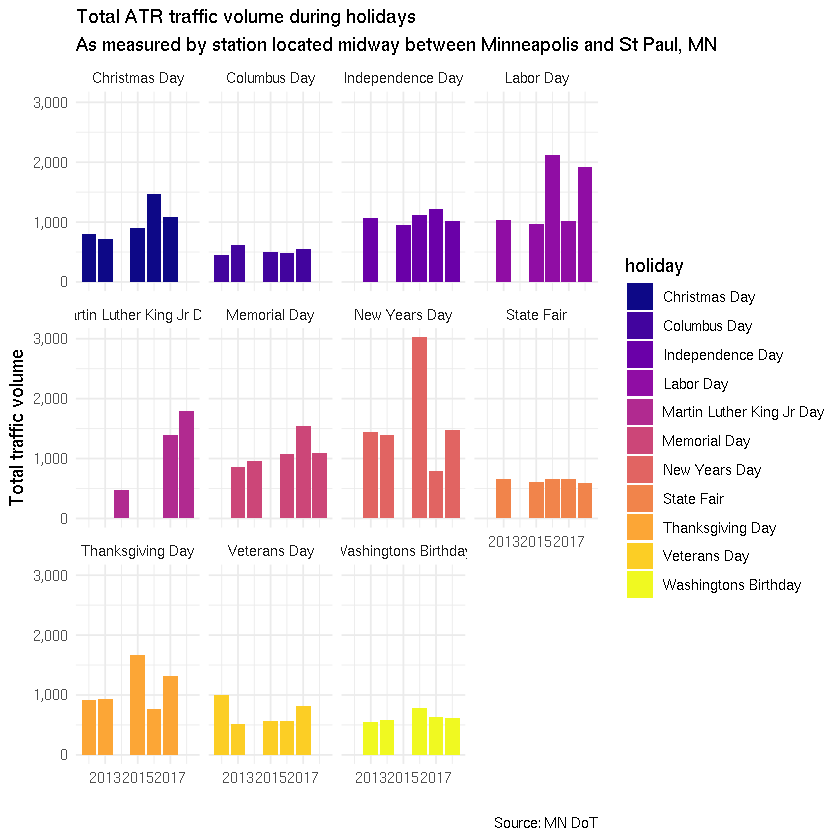

In [18]:
traffic_MN %>%
  group_by(holiday, year) %>%
  summarize(total_ATR = sum(traffic_volume, na.rm = T), .groups = "drop") %>%
  filter(holiday != "None") %>%
  ggplot() + 
  geom_col(aes(x = year, y = total_ATR, fill = holiday)) + 
  facet_wrap(vars(holiday)) + 
  labs(x = "", y = "Total traffic volume", 
       title = "Total ATR traffic volume during holidays", 
       subtitle = "As measured by station located midway between Minneapolis and St Paul, MN", 
       caption = 'Source: MN DoT') + 
  scale_y_continuous(labels = scales::comma) + 
  scale_fill_viridis_d(option = "plasma") + 
  theme_minimal()

<div class="alert alert-block alert-warning" style="display:inline-block;" markdown="1">

**Practice**: explore the relationship between other variables. Can you characterize the trends you observe? Do they make sense? What type of other data summaries would be useful in this case? 

</div>

<div class="alert alert-block alert-success" markdown="1">

**Success!** You can now return to the main page to continue learning.

</div>

### Citation 
_(as described in UCI Machine Learning repository page)_

- Traffic data from MN Department of Transportation
- Weather data from OpenWeatherMap
- John Hogue, Social Data Science & General Mills